## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

-working with imbalance data set and finding best model
-working on dataset after balancing with oversampling methods uniform , SMOTE, ADASYN
-finding the best model on balanced dataset


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [ ]:
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#observe the different feature type present in the data

creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [ ]:
classes=creditcard_df['Class'].value_counts()
normal_share=classes[0]/creditcard_df['Class'].count()*100
fraud_share=classes[1]/creditcard_df['Class'].count()*100
print("Non-Fraudulent : {} %".format(normal_share))
print("Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.82725143693798 %
Fraudulent : 0.1727485630620034 %


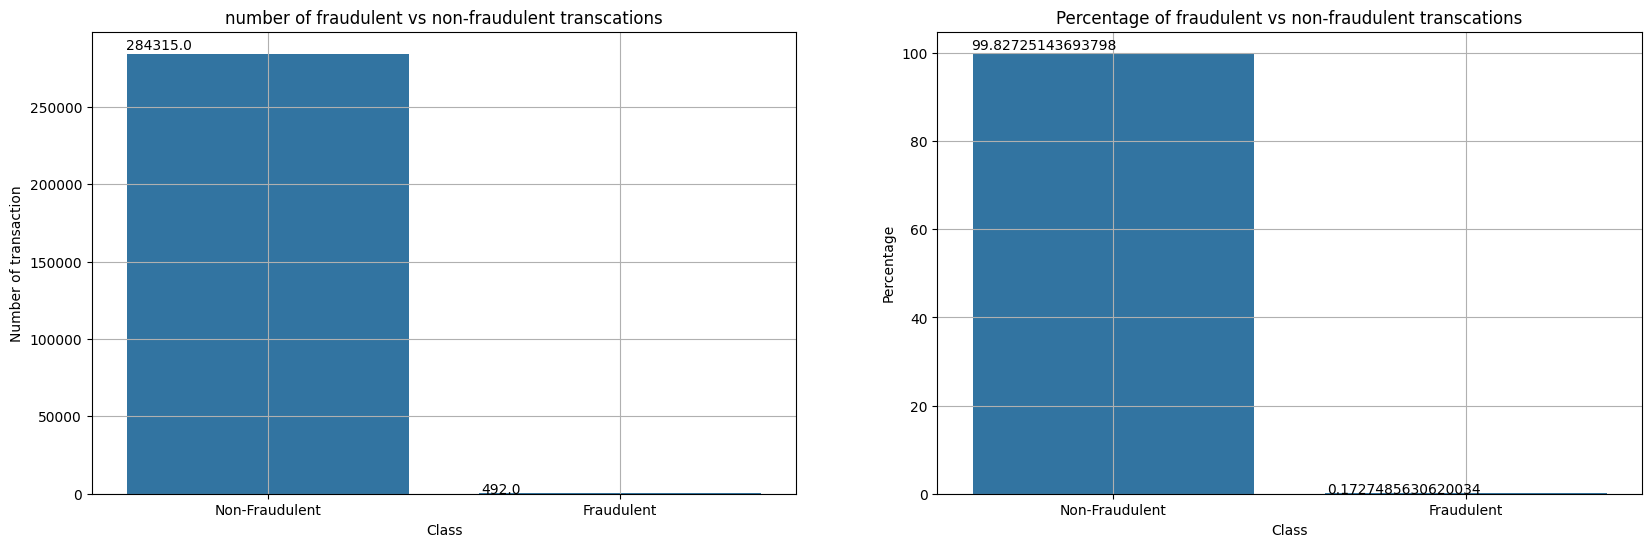

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
class_count = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Count':[classes[0], classes[1]]}
df_fraud_count = pd.DataFrame(class_count)
ax=sns.barplot(x='Class',y='Count', data=class_count)
for p in ax.patches:
   ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("number of fraudulent vs non-fraudulent transcations")
plt.grid()
plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
ax=sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.grid()


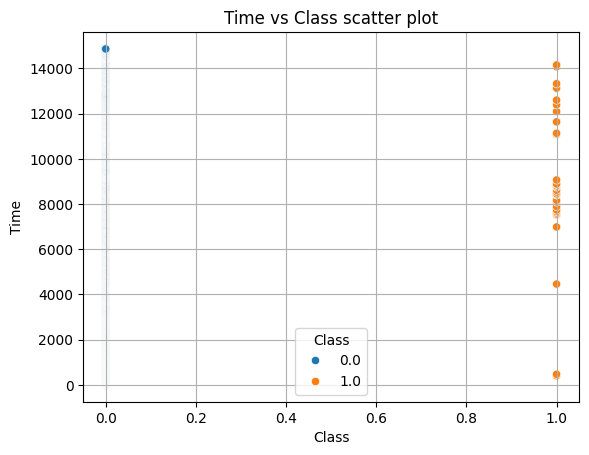

In [ ]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x=creditcard_df['Class'], y=creditcard_df['Time'],hue=creditcard_df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()

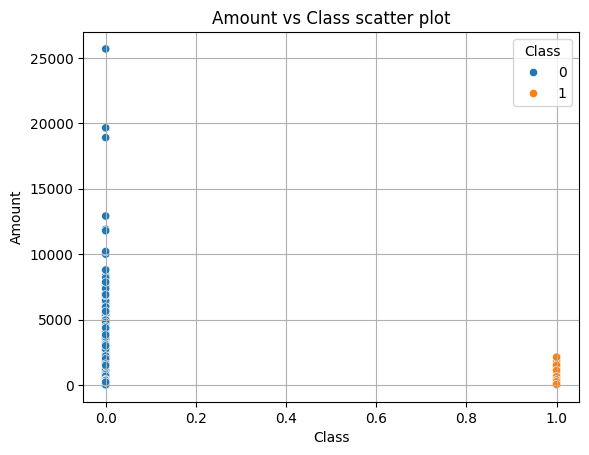

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x=creditcard_df['Class'], y=creditcard_df['Amount'], hue = creditcard_df['Class'])
plt.title("Amount vs Class scatter plot")
plt.grid()

In [ ]:
# Drop unnecessary columns
creditcard_df = creditcard_df.drop(['Time'], axis=1)

In [ ]:
creditcard_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Splitting the data into train & test data

In [ ]:
y= creditcard_df['Class']#class variable
X= creditcard_df.drop(['Class'], axis=1)#features
y.shape, X.shape

((284807,), (284807, 29))

In [94]:
from sklearn import model_selection
#Stratified train-test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=40,stratify=y )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((213605, 29), (71202, 29), (213605,), (71202,))

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
371
121


### Plotting the distribution of a variable

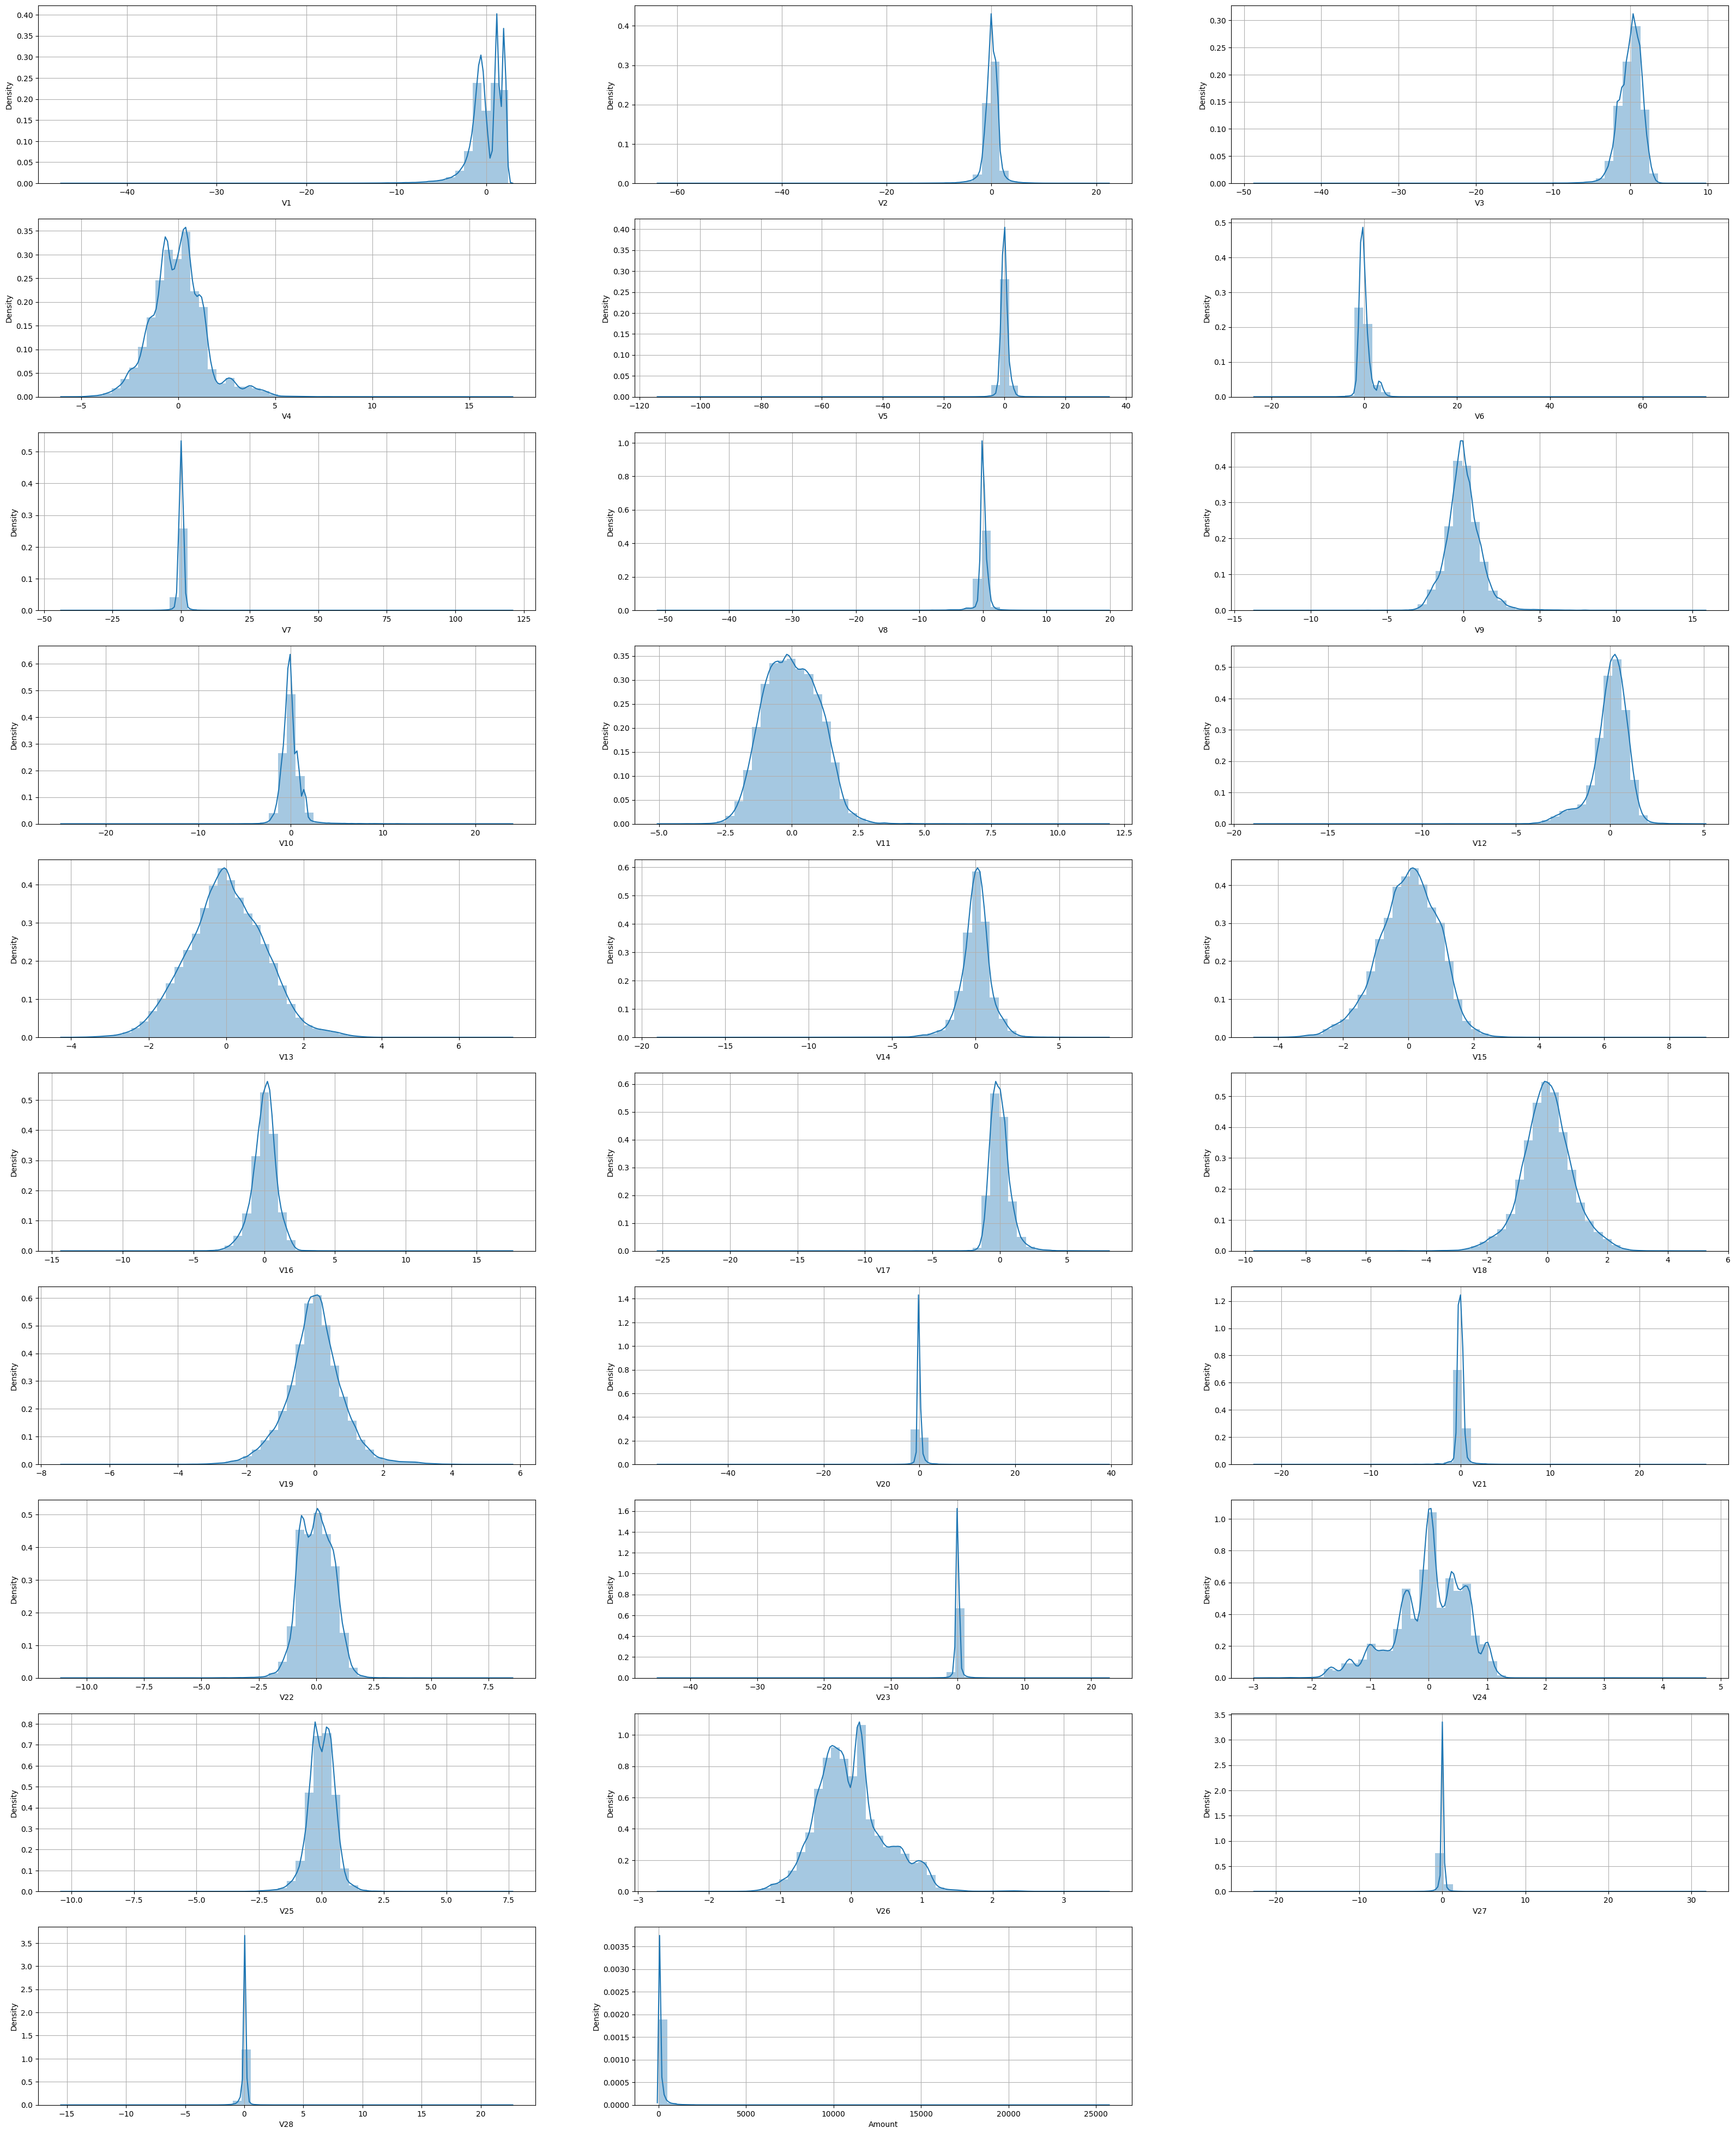

In [96]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns
plt.figure(figsize=(40,50))
count =1
for col in var:
    plt.subplot(10,3,count)
    count+=1
    sns.distplot(X_train[col])
    plt.grid()

plt.show()


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [99]:
#find the skewness of columns
columns = X_train.columns
skew_list = []
for i in columns:
    skew_list.append(X_train[i].skew())

skew_df = pd.concat([pd.DataFrame(columns, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
skew_df.set_index("Features", inplace=True)
skew_df

,Skewness
Features,
V1,-3.274269
V2,-4.547641
V3,-2.276159
V4,0.675242
V5,-3.105712
V6,2.021475
V7,3.571374
V8,-7.812864
V9,0.556356


In [100]:
#make list of columns which has skewness greater than +1 and less than -1
tmp = skew_df.loc[ (skew_df['Skewness'] > 1) | ( skew_df['Skewness'] < -1)].index
tmp.tolist()

['V1',
 'V2',
 'V3',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V16',
 'V17',
 'V20',
 'V21',
 'V23',
 'V28',
 'Amount']

In [101]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
power_transform = preprocessing.PowerTransformer()
#transform train data
X_train[tmp] = power_transform.fit_transform(X_train[tmp])
#transform test data
X_test[tmp] = power_transform.transform(X_test[tmp])

#check after transforming
trans_skew = X_train[tmp].skew()
test_skew = X_test[tmp].skew()
print(trans_skew)
print(test_skew)

V1       -0.217750
V2        0.377937
V3       -0.078475
V5       -1.329588
V6       -1.843567
V7        2.807959
V8        2.242523
V10      -1.361096
V12       0.143481
V14       0.099404
V16       0.169488
V17      -0.780366
V20      -0.989450
V21      -1.663365
V23      -0.336895
V28       0.559563
Amount    0.018410
dtype: float64
V1       -0.191234
V2        0.364393
V3       -0.059733
V5        0.709648
V6       -2.568255
V7       -1.241970
V8        1.723604
V10      -1.268395
V12       0.266264
V14       0.147371
V16      -0.035894
V17      -0.262448
V20      -1.359304
V21      -5.056770
V23      -0.088569
V28       5.372711
Amount    0.014323
dtype: float64


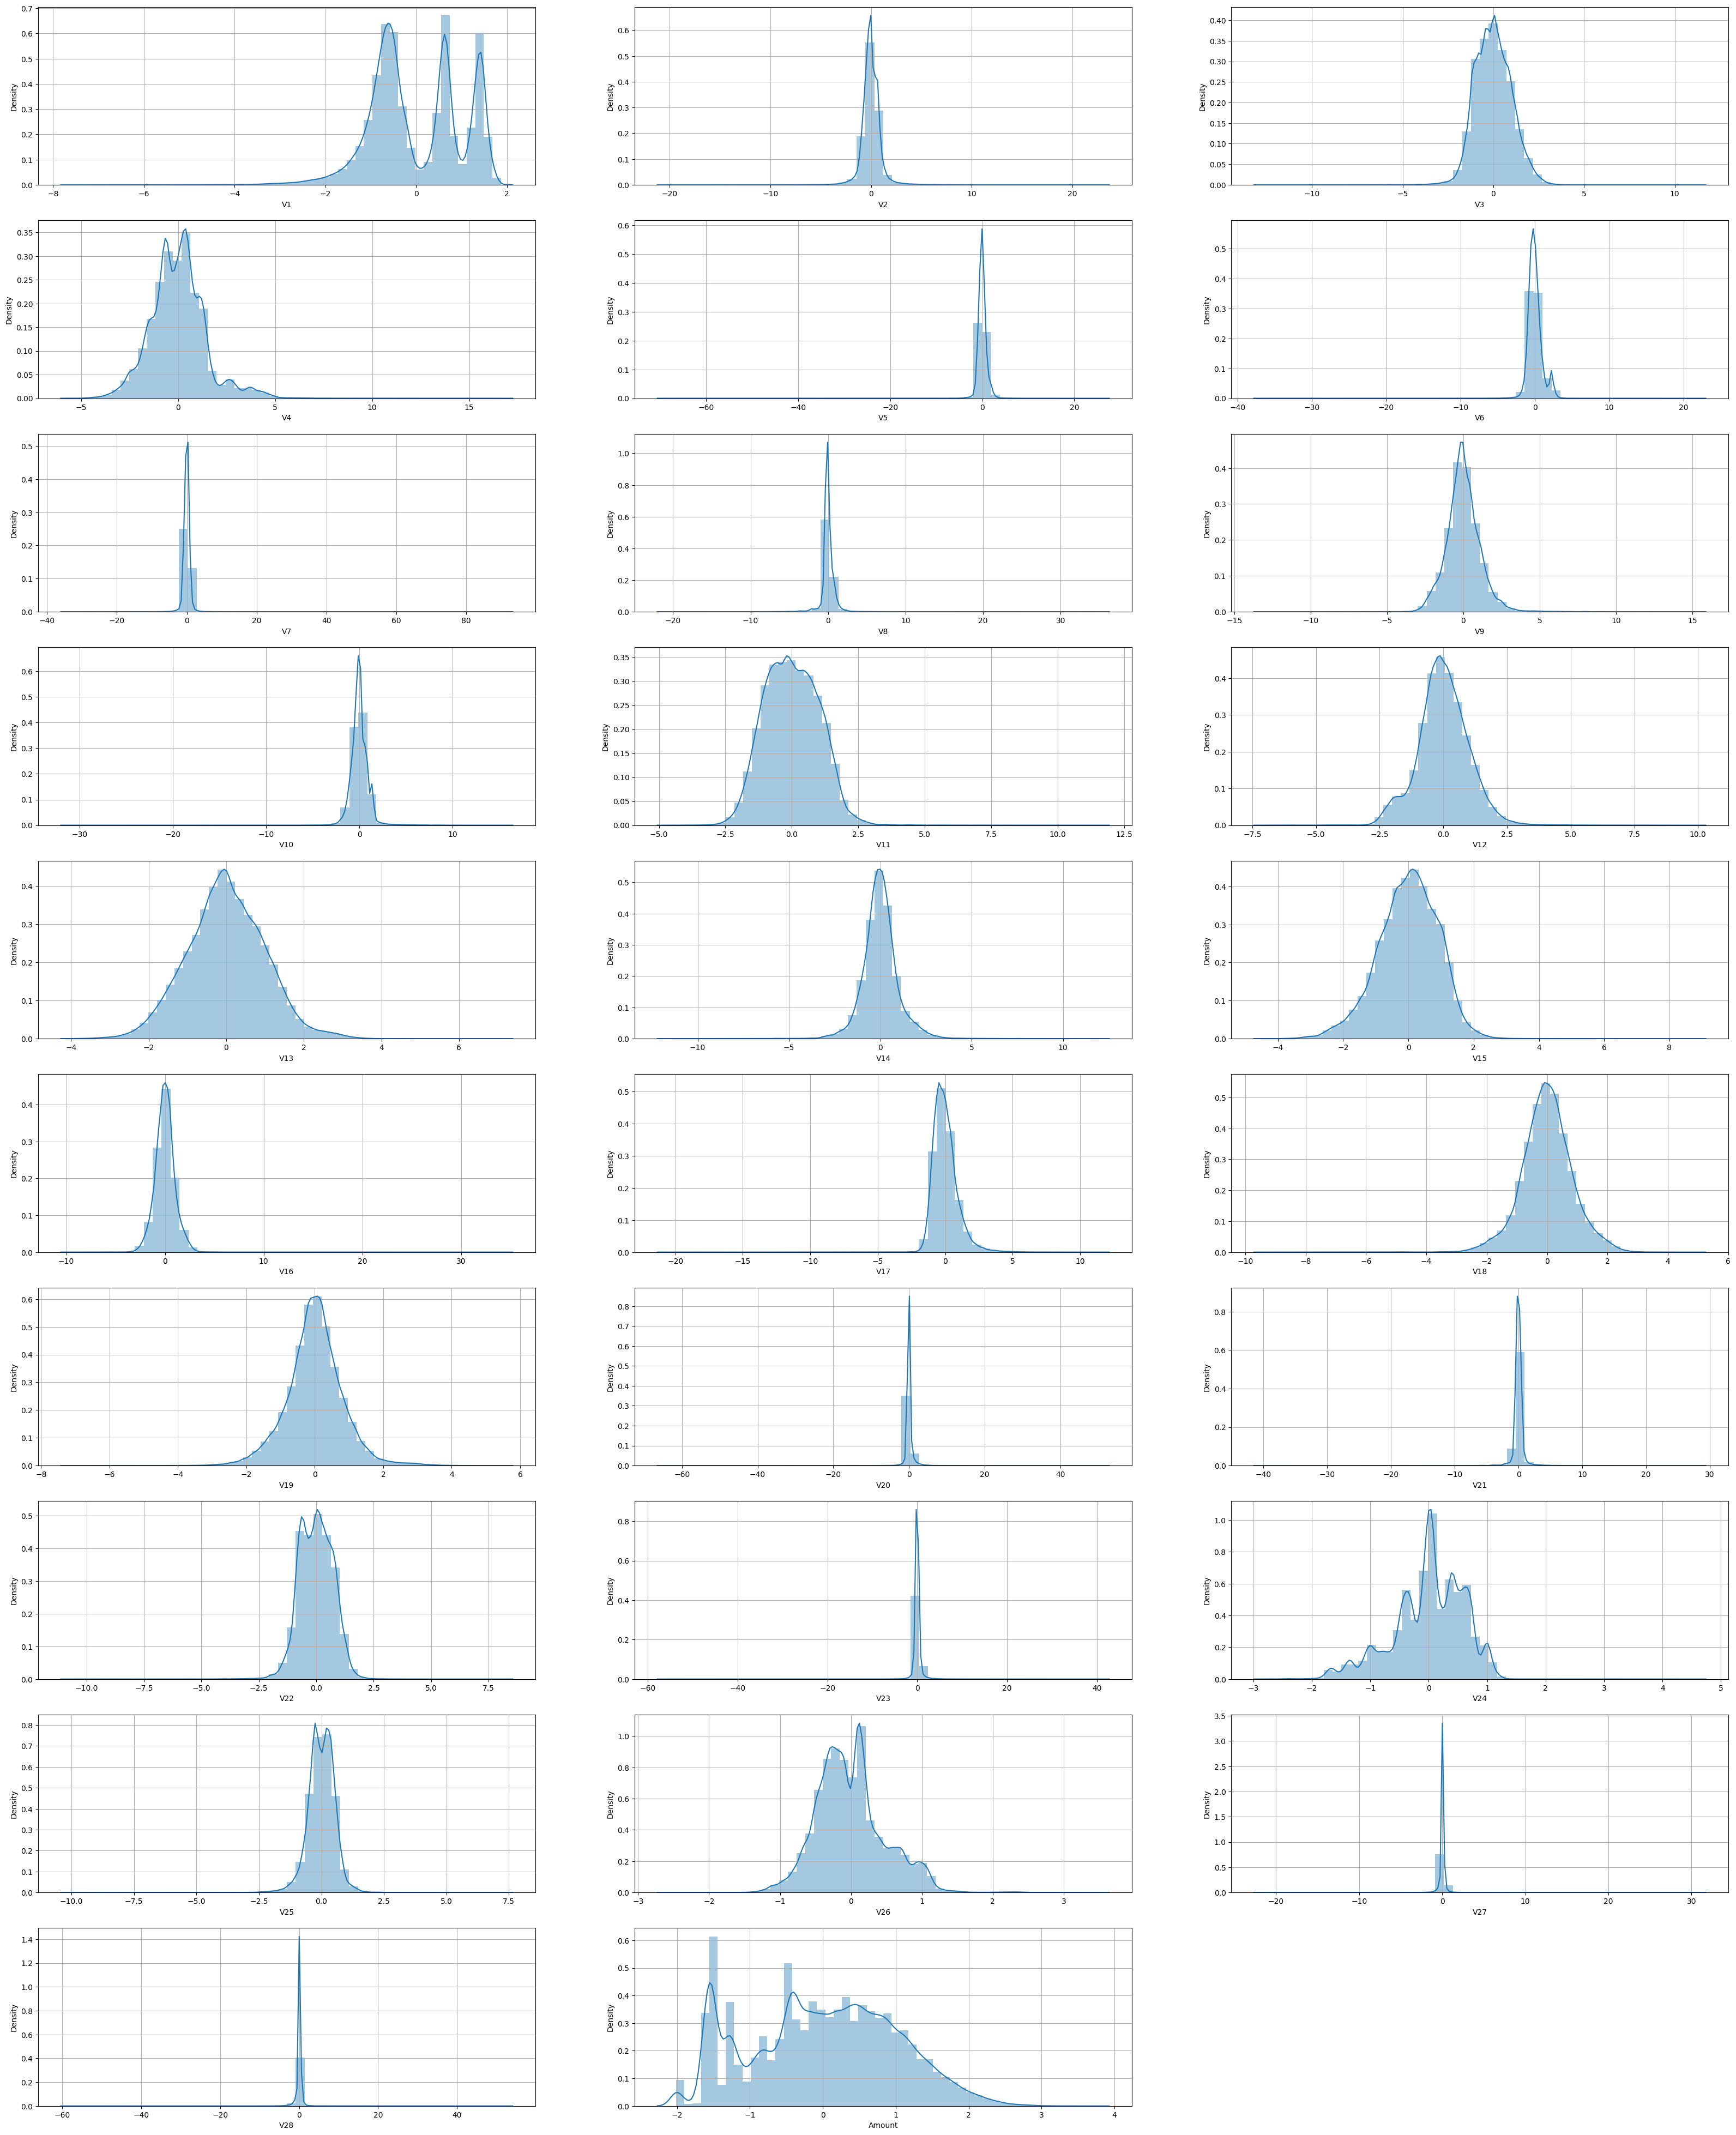

In [102]:
# plot the histogram of a variable from the dataset again to see the result
var = X_train.columns
plt.figure(figsize=(40,50))
count =1
for col in var:
    plt.subplot(10,3,count)
    count+=1
    sns.distplot(X_train[col])
    plt.grid()

plt.show()

In [103]:
print (X_train)

              V1        V2        V3        V4        V5        V6        V7  \
105052 -0.792937  1.205121 -0.158484  0.980184 -0.060110 -0.172571 -0.101665   
236323 -0.221647  0.436458 -0.222912 -0.918166  0.629884 -0.102367  0.697252   
277682  1.451562  0.064348 -1.127888  0.419497  0.348172 -0.650098  0.224703   
22249  -0.719260  0.732578  0.948483  1.395205 -0.094180 -0.032624  0.379439   
56088   0.169171 -0.622874  0.856811  1.833747 -0.895737  0.448287 -0.361931   
...          ...       ...       ...       ...       ...       ...       ...   
35691   0.424846 -0.196072  0.811291  2.811455 -0.351106  0.931077 -0.469364   
121555  0.601043  0.072906  0.153350  1.389495 -0.093334 -0.023651  0.082327   
51012  -0.631540  0.456788  0.512318  0.562767 -0.015251 -0.842224  0.348590   
160120  1.082106 -1.099386 -0.667019 -0.754815 -0.869599 -0.037362 -0.653824   
75836  -0.519656  0.235120  1.899850  1.579943 -0.171239  0.321348  0.135036   

              V8        V9       V10  .

In [104]:
 creditcard_df.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.001,0.01,0.1,1,10,100]  #--> list of values
for cv_num in num_C:
  clf = linear_model.LogisticRegression(C=cv_num, random_state = 0) #default penalty term is l2
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))

  print('')


C: 0.001
Coefficient of each feature: [[-0.06140263  0.03836597 -0.14106838  0.28902198  0.04624244 -0.03374699
  -0.0523804  -0.12225154 -0.11376083 -0.1987693   0.15637431 -0.22297534
  -0.04218981 -0.38155299 -0.00197565 -0.1087325  -0.08588252 -0.00266604
  -0.00578506  0.00109968  0.04320599  0.01794155 -0.01614007 -0.01915375
  -0.00275269  0.00762637 -0.01783802 -0.01133102 -0.01567529]]
Training accuracy: 0.9989606984855224

C: 0.01
Coefficient of each feature: [[-0.16174271 -0.05355743 -0.26128236  0.45537281  0.02399145  0.03006282
  -0.0997451  -0.2489582  -0.20418744 -0.19930334  0.03617513 -0.42770185
  -0.14545353 -0.65376679 -0.03593491 -0.24854301 -0.01407988  0.06133539
  -0.07142575 -0.05932747  0.08721988  0.14433649 -0.02869679 -0.01327978
   0.03337358  0.01460805 -0.10548797 -0.04262532 -0.0059721 ]]
Training accuracy: 0.999124552327895

C: 0.1
Coefficient of each feature: [[-0.24724879 -0.19330632 -0.3821069   0.48295113 -0.04200094  0.09081047
  -0.17514774 -0.2

##c=1 has better accuracy

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv
- y_train_cv
- y_test_cv

In [ ]:
#perform cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

grid={"C":np.logspace(-3,3,7) , "penalty":["l2"]}  # l2 ridge

lr_model = LogisticRegression(C=1)
lr_model_cv = GridSearchCV(lr_model,grid,cv=folds,scoring='roc_auc',return_train_score=True)
lr_model_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lr_model_cv.best_params_)
print("accuracy :",lr_model_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9822942538063554



### Similarly explore other algorithms by building models like:
- KNN
- Decision Tree
- Random Forest
- XGBoost

##Build KNN model

this model was run for 4 hours, so inbetween stopped to proceed

In [93]:
#build KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier()
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3 ],
    'weights': ['uniform' ],
    'metric': ['euclidean' ]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
# Train the model with the best parameters
knn_best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(knn_best_model, X_train, y_train, cv=folds)
print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score: 0.9116568484080764
Best Model Cross-Validation Scores: [0.99941481 0.99957866 0.99946162 0.99936799 0.99953185]


##Build Decision tree model


In [57]:
#Build Decision tree model
from sklearn.tree import DecisionTreeClassifier
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2,scoring= 'roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"tuned hpyerparameters :(best parameters)  {grid_search.best_params_}")
print(f"accuracy {grid_search.best_score_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy 0.9381942489232783


##Build Random forest model

In [58]:
#build Random forest model
from sklearn.ensemble import RandomForestClassifier

#create Random forest model instance
RF_model = RandomForestClassifier(random_state=42)

#build model with cross validation
scores = cross_val_score(RF_model, X_train, y_train, cv=folds, scoring='roc_auc')
print(scores)


[0.94322646 0.9504732  0.91539165 0.92331342 0.9527967 ]


In [59]:
# Random Forest Hyperparameter tuning
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2,scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train, y_train, cv=folds)
print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Best Score: 0.96762327718002
Best Model Cross-Validation Scores: [0.99946162 0.99957866 0.99943822 0.99936799 0.99953185]


##Build XGBoost model


In [60]:
#build XGBoost model
import xgboost as xgb

# Initialize the XGBoost Classifier
xgboost_model = xgb.XGBClassifier(random_state=42)
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [5, 20, 50],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=folds, n_jobs=-1, scoring ="roc_auc")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train, y_train, cv=folds)

print(f"Best Model Cross-Validation Scores: {best_scores}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.9821313374623163
Best Model Cross-Validation Scores: [0.99948503 0.99957866 0.99934458 0.99941481 0.99955525]


In [62]:
def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

### XGBoost model showed the best result with Accuracy 0.9821

#### Proceed with the model which shows the best result
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

 #initialise the model with optimum hyperparameters

better_model = xgb.XGBClassifier(random_state=42,colsample_bytree =1.0,
                                 learning_rate=0.2, max_depth =3, n_estimators = 50, subsample = 1.0) #default penalty='l2' #initialise the model with optimum hyperparameters
better_model.fit(X_train, y_train)
print('Training accuracy:', better_model.score(X_train, y_train))
result = better_model.predict_proba(X_test)
result = result[:, 1]
auc = roc_auc_score(y_test, result)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,result, pos_label='Non_Fraudulent')
predicted=better_model.predict(X_test)
report = classification_report(y_test, predicted)
#print the evaluation score on the X_test by choosing the best evaluation metric
print(report)

Training accuracy: 0.9996207953933662
AUC: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.93      0.84      0.88       121

    accuracy                           1.00     71202
   macro avg       0.96      0.92      0.94     71202
weighted avg       1.00      1.00      1.00     71202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 10
2nd Top var = 14
3rd Top var = 12


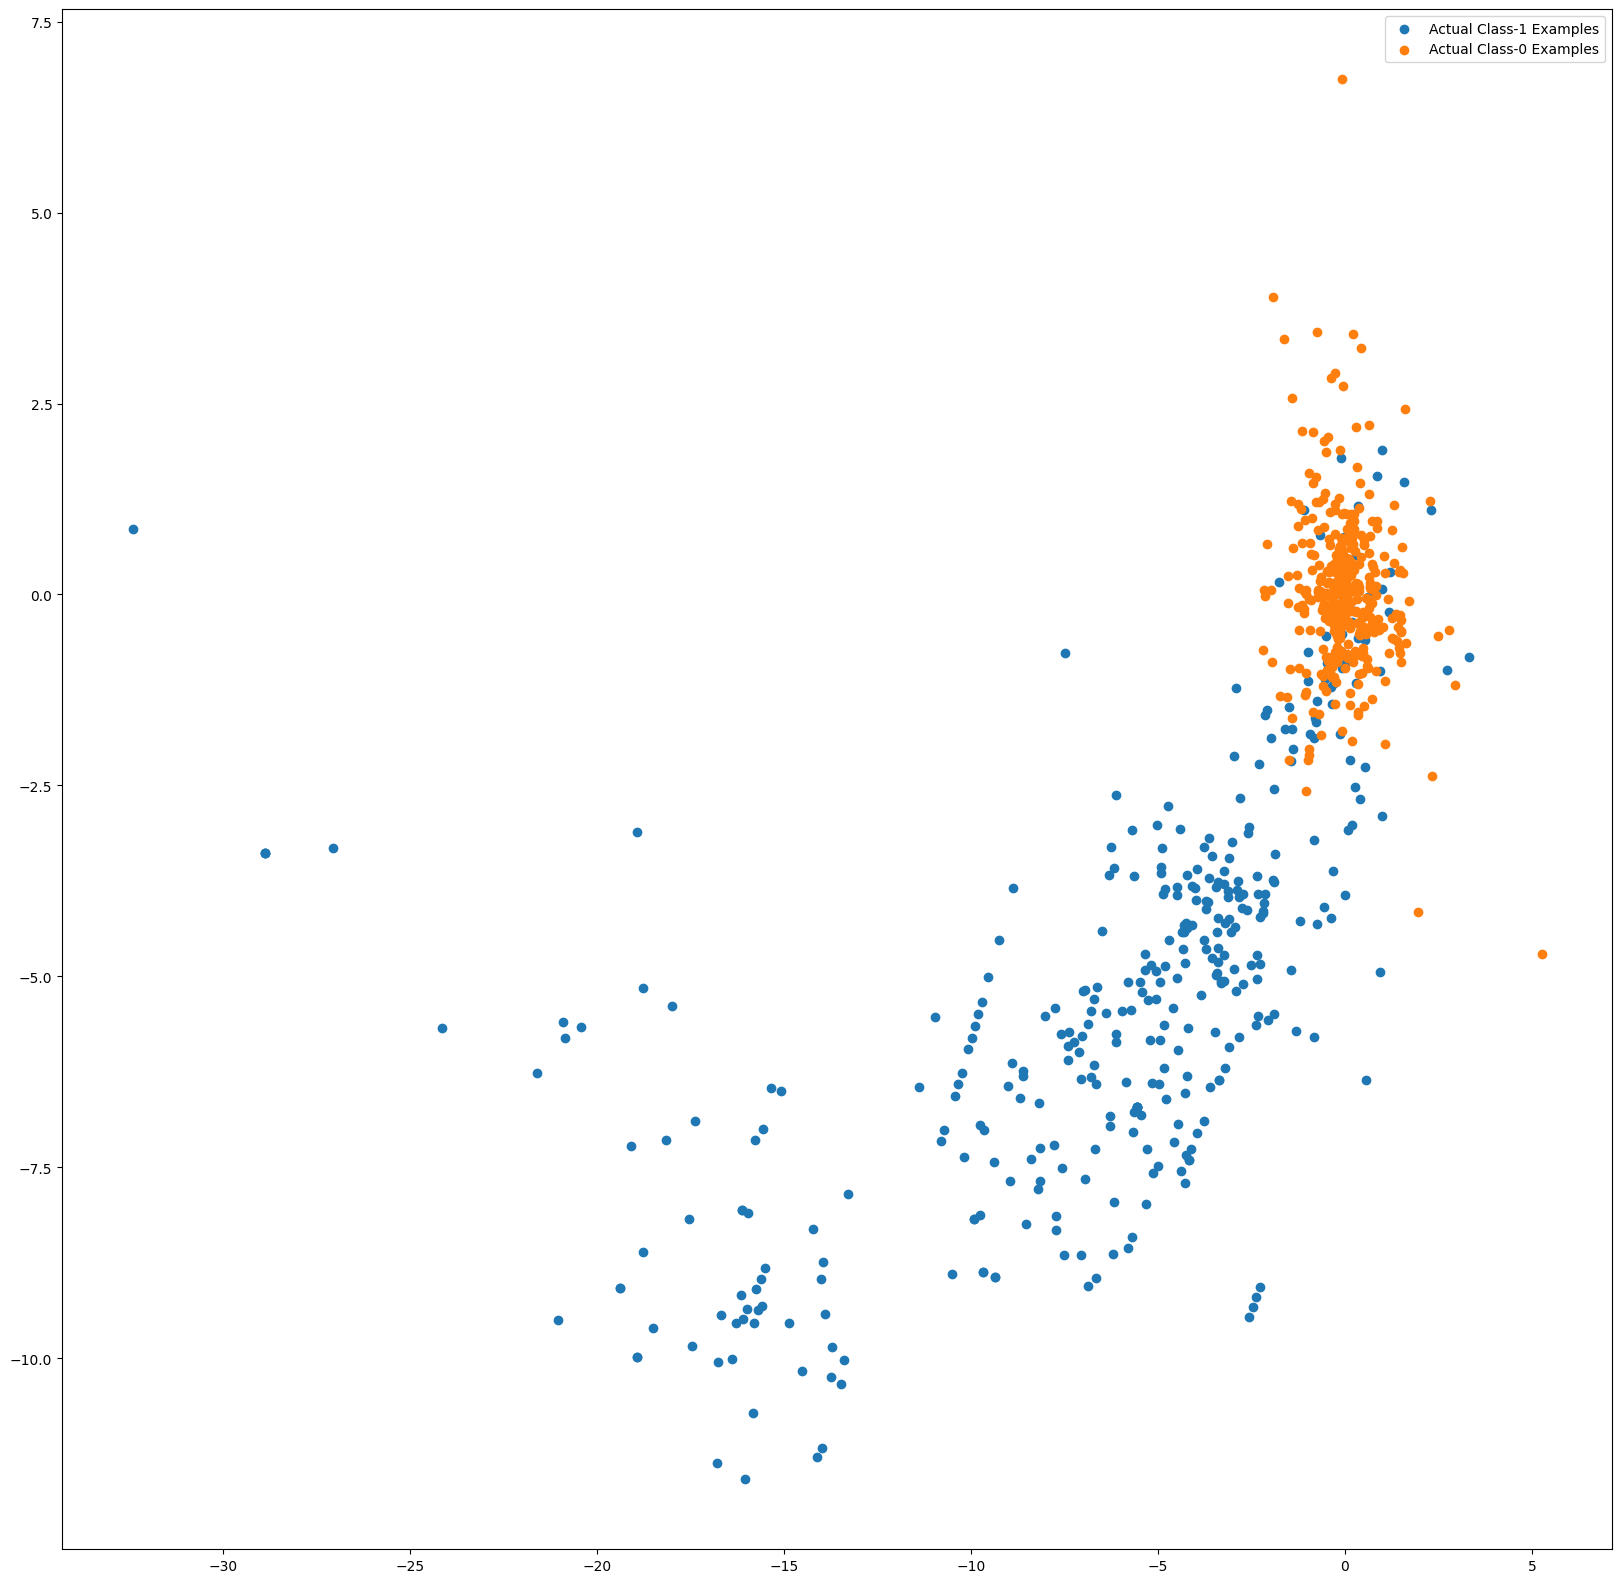

In [65]:
var_imp = []
for i in better_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(better_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(better_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(better_model.feature_importances_)[-3])+1)

# Variable on Index-10 and Index-14 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(better_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(better_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

###  3 models performed best on unbalanced data will be applied on balanced dataset, models are:
- Logistic Regression
- Random Forest
- XGBoost


### Random Oversampling

####Logistic Regression model

In [66]:
from imblearn import over_sampling #- import the packages
kfolds = KFold(n_splits = 5, shuffle = True, random_state = 42)

grid={"C":np.logspace(-3,3,7) , "penalty":["l2"]}  # l2 ridge
#perform cross validation & then balance classes on X_train  & y_train using Random Oversampling
#perform hyperparameter tuning
b_lr_model = LogisticRegression(C=1,class_weight ='balanced')
b_lr_model_cv = GridSearchCV(b_lr_model,grid,cv=kfolds,scoring='roc_auc',return_train_score=True)
b_lr_model_cv.fit(X_train,y_train)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",b_lr_model_cv.best_params_)
#print the evaluation result by choosing a evaluation metric
print("accuracy :",b_lr_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 0.9795851546835921


Random Forest Model

In [67]:
# Random Forest intiate
#create Random forest model instance
b_RF_model = RandomForestClassifier(random_state=42,class_weight ='balanced')
# Best hyperparameter
param_grid = {
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'bootstrap': [True ]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=b_RF_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2,scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train, y_train, cv=folds)
print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.9237800353443462
Best Model Cross-Validation Scores: [0.99936799 0.99964888 0.9993914  0.99927436 0.99950844]


XGBoost Model

In [73]:
#build XGBoost model
import xgboost as xgb

#to treat data in balanced way need calculate below ratio of minority class and majority class
balance_ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

# Initialize the XGBoost Classifier with best parameters on balanced data
b_xgboost_model = xgb.XGBClassifier(random_state=42 ,scale_pos_weight = balance_ratio)
param_grid = {'colsample_bytree': [1.0], 'learning_rate': [0.2], 'max_depth': [3],
              'n_estimators': [50], 'subsample': [1.0]}
# Initialize GridSearchCV
b_xgboost_cv = GridSearchCV(estimator=b_xgboost_model,param_grid =param_grid,  cv=folds, n_jobs=-1, scoring ="roc_auc")

# Fit the grid search to the data
b_xgboost_cv.fit(X_train, y_train)

# Print best score
print(f"Best Score: {b_xgboost_cv.best_score_}")

# Train the model with the best parameters
best_model = b_xgboost_cv.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train, y_train, cv=folds)

print(f"Best Model Cross-Validation Scores: {best_scores}")


Best Score: 0.9738071093187429
Best Model Cross-Validation Scores: [0.99253295 0.99220524 0.99454601 0.99351607 0.99159664]


### Print the class distribution after applying SMOTE

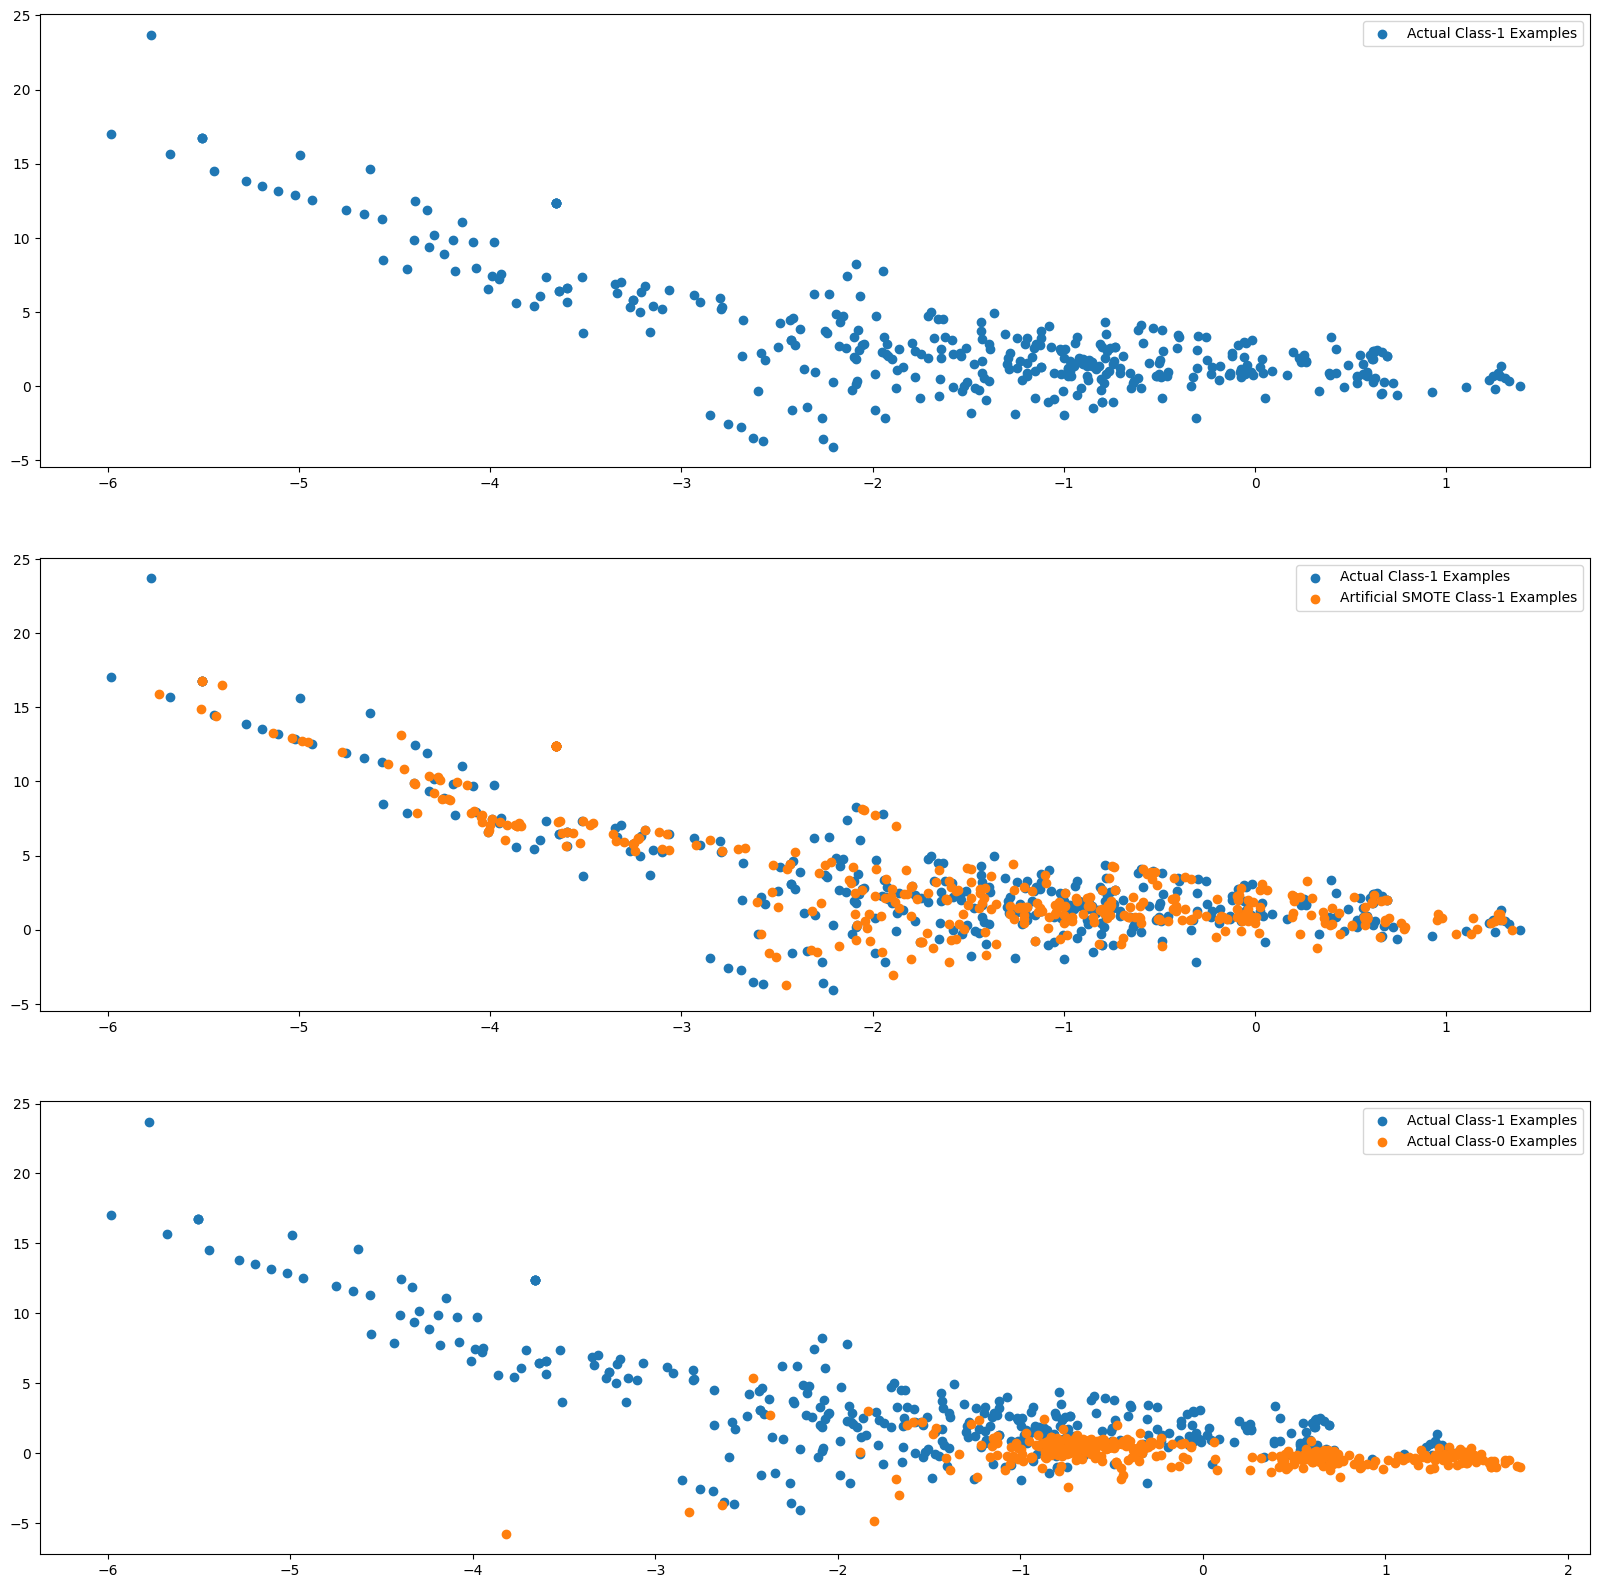

In [75]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on SMOTE

###Logistic Regression Model

In [76]:
grid={"C":np.logspace(-3,3,7) , "penalty":["l2"]}  # l2 ridge
#perform cross validation
# best parameter choosed from previous training
smote_lr_model = LogisticRegression(C=1)
smote_lr_model_cv = GridSearchCV(smote_lr_model,grid,cv=kfolds,scoring='roc_auc',return_train_score=True)
#apply model on SMOTE balanced data set X_train_smote,y_train_smote
smote_lr_model_cv.fit(X_train_smote,y_train_smote)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",smote_lr_model_cv.best_params_)
#print the evaluation result by choosing a evaluation metric
print("accuracy :",smote_lr_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.990225708068512


###Random Forest Model

In [77]:
# Random Forest intiate
#create Random forest model instance
smote_RF_model = RandomForestClassifier(random_state=42)
# Best hyperparameter,choosed from previous training
param_grid = {
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'bootstrap': [True ]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(estimator=smote_RF_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2,scoring='roc_auc')

# Fit the grid search to the data
rf_grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print(f"Best Parameters: {rf_grid_search.best_params_}")
print(f"Best Score: {rf_grid_search.best_score_}")

# Train the model with the best parameters
smote_rf_best_model = rf_grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(smote_rf_best_model, X_train_smote, y_train_smote, cv=folds)
print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.9999827723884807
Best Model Cross-Validation Scores: [0.99975379 0.99977724 0.99983586 0.99980069 0.99984758]


###XGBoost model



In [78]:
# Initialize the XGBoost Classifier
xgboost_model = xgb.XGBClassifier(random_state=42)
# Define the parameter grid ,best parameters choosed from previous training
param_grid = {'colsample_bytree': [1.0], 'learning_rate': [0.2], 'max_depth': [3],
              'n_estimators': [50], 'subsample': [1.0]}
# Initialize GridSearchCV
smote_xgboost_grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2, scoring ="roc_auc")

# Fit the grid search to the smote data
smote_xgboost_grid_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and best score
print(f"Best Parameters: {smote_xgboost_grid_search.best_params_}")
print(f"Best Score: {smote_xgboost_grid_search.best_score_}")

# Train the model with the best parameters
best_model = smote_xgboost_grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train_smote, y_train_smote, cv=folds)

print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.998801052224233
Best Model Cross-Validation Scores: [0.98344549 0.98309377 0.98178066 0.9830115  0.98182735]


### Print the class distribution after applying ADASYN

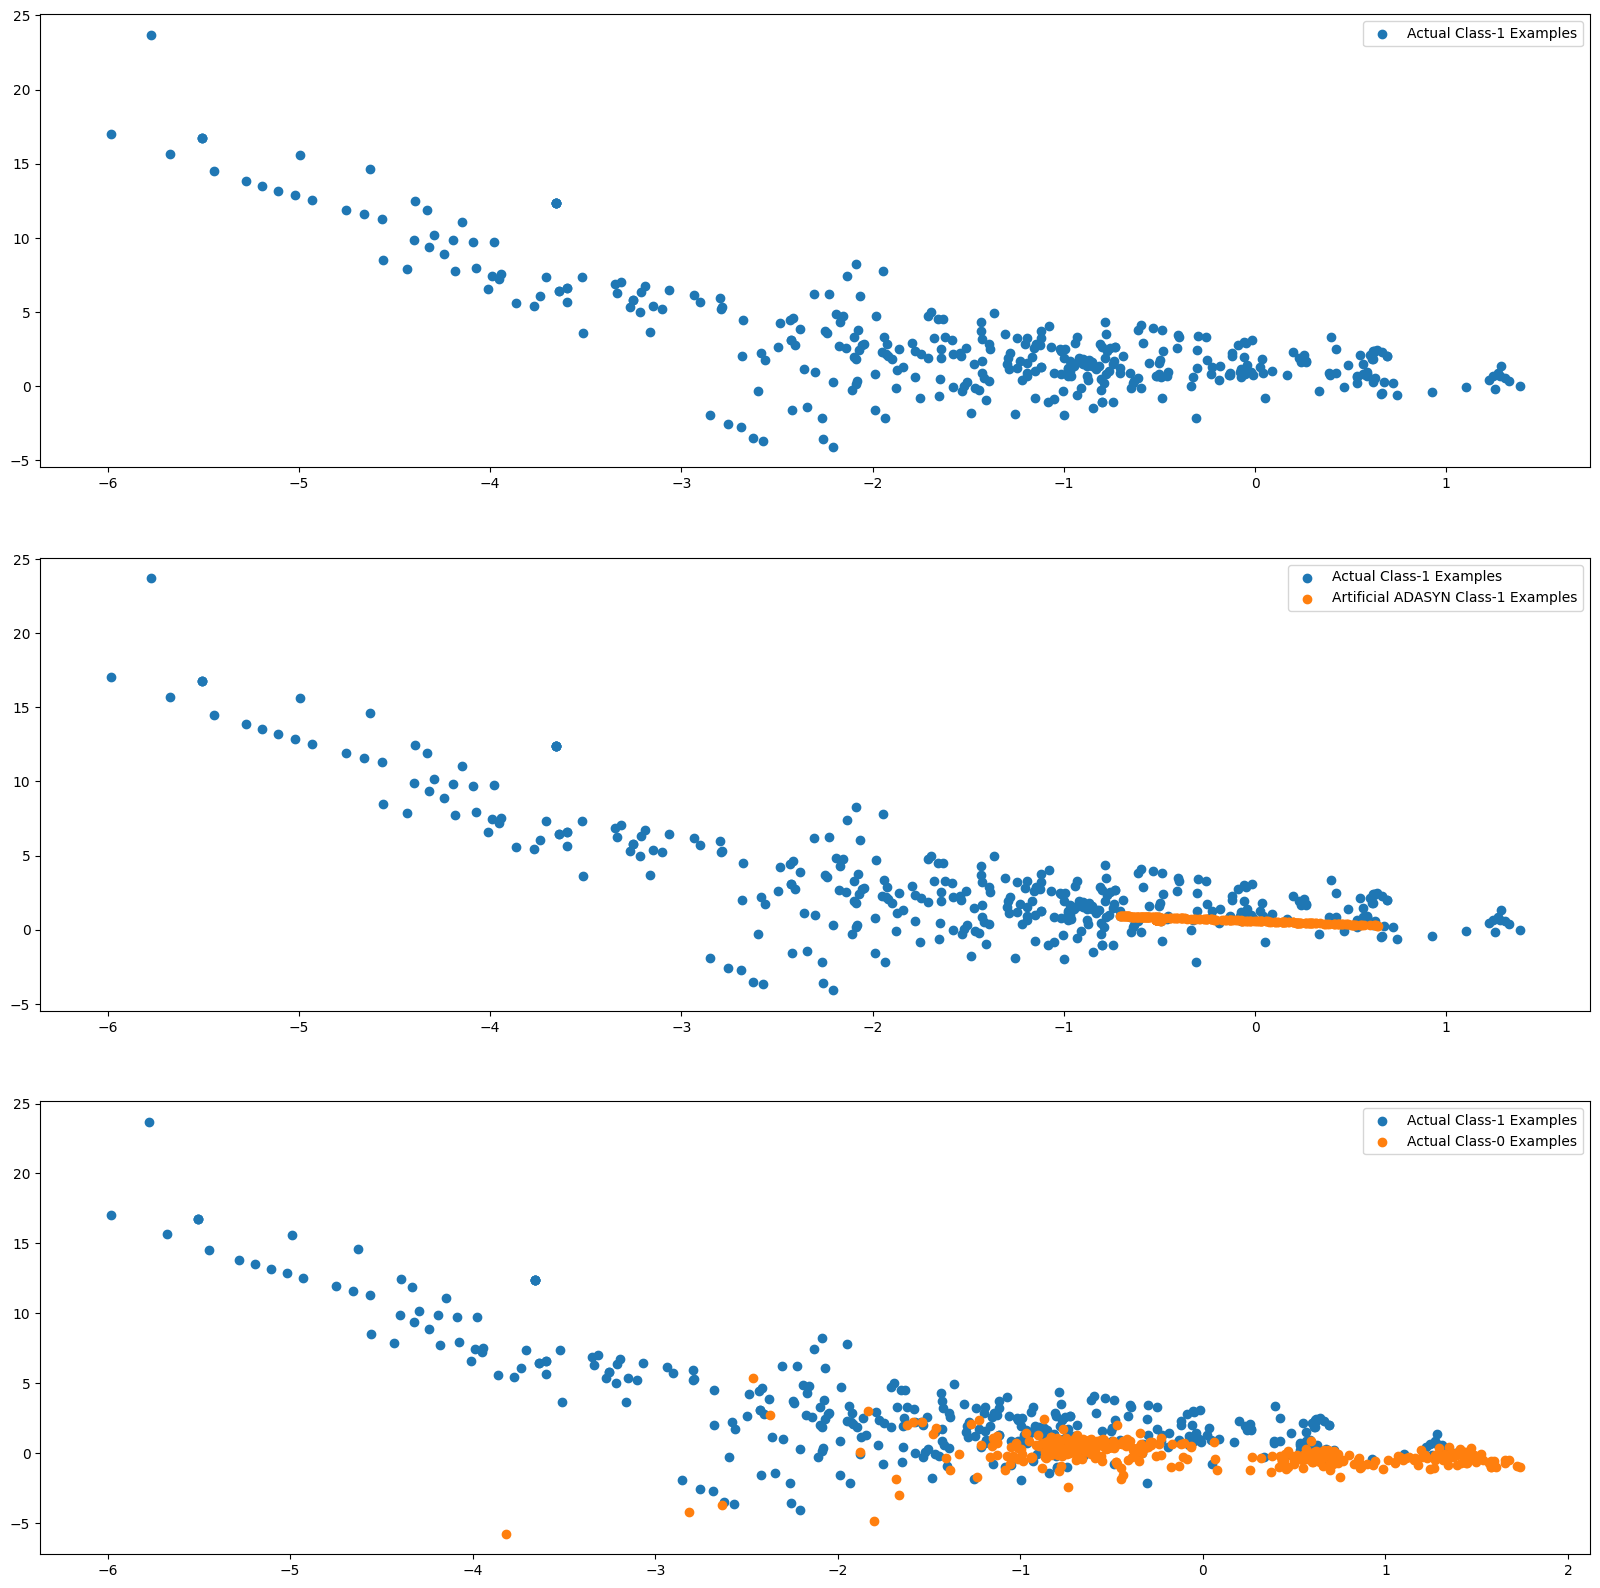

In [80]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

###Logistic Regression Model

In [81]:
grid={"C":np.logspace(-3,3,7) , "penalty":["l2"]}  # l2 ridge
#perform cross validation
# best parameter choosed from previous training
adasyn_lr_model = LogisticRegression(C=1)
adasyn_lr_model_cv = GridSearchCV(adasyn_lr_model,grid,cv=kfolds,scoring='roc_auc',return_train_score=True)
#apply model on SMOTE balanced data set X_train_adasyn,y_train_adasyn
adasyn_lr_model_cv.fit(X_train_adasyn,y_train_adasyn)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",adasyn_lr_model_cv.best_params_)
#print the evaluation result by choosing a evaluation metric
print("accuracy :",adasyn_lr_model_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9683893482369772


###Random Forest Model

In [82]:
# Random Forest intiate
# create Random forest model instance
adasyn_RF_model = RandomForestClassifier(random_state=42)
# Best hyperparameter,choosed from previous training
param_grid = {
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'bootstrap': [True ]
}

# Initialize GridSearchCV
adasyn_rf_grid_search = GridSearchCV(estimator=adasyn_RF_model, param_grid=param_grid, cv=folds, n_jobs=-1,scoring='roc_auc')

# Fit the grid search to the data
adasyn_rf_grid_search.fit(X_train_adasyn, y_train_adasyn)

# Print the best parameters and best score
print(f"Best Parameters: {adasyn_rf_grid_search.best_params_}")
print(f"Best Score: {adasyn_rf_grid_search.best_score_}")

# Train the model with the best parameters
adasyn_rf_best_model = adasyn_rf_grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(adasyn_rf_best_model, X_train_adasyn, y_train_adasyn, cv=folds)
print(f"Best Model Cross-Validation Scores: {best_scores}")

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: 0.9999934097850416
Best Model Cross-Validation Scores: [0.99967172 0.99983586 0.99985931 0.99978896 0.99981241]


###XGBoost Model

In [83]:
# Initialize the XGBoost Classifier
adasyn_xgboost_model = xgb.XGBClassifier(random_state=42)
# Define the parameter grid with best parameters choosed from previous training
param_grid = {'colsample_bytree': [1.0], 'learning_rate': [0.2], 'max_depth': [3],
              'n_estimators': [50], 'subsample': [1.0]}
# Initialize GridSearchCV
adasyn_xgboost_grid_search = GridSearchCV(estimator=adasyn_xgboost_model, param_grid=param_grid, cv=folds, n_jobs=-1, verbose=2, scoring ="roc_auc")

# Fit the grid search to the smote data
adasyn_xgboost_grid_search.fit(X_train_adasyn, y_train_adasyn)

# Print the best parameters and best score
print(f"Best Parameters: {adasyn_xgboost_grid_search.best_params_}")
print(f"Best Score: {adasyn_xgboost_grid_search.best_score_}")

# Train the model with the best parameters
best_model = adasyn_xgboost_grid_search.best_estimator_

# Perform cross-validation with the best model
best_scores = cross_val_score(best_model, X_train_adasyn, y_train_adasyn, cv=folds)

print(f"Best Model Cross-Validation Scores: {best_scores}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best Score: 0.9965826153275359
Best Model Cross-Validation Scores: [0.97419483 0.97577761 0.97421828 0.97400725 0.97495691]


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

###ADASYN oversampling with Random Forest model gives the best result score of 0.9999934097850416

### Best parameter {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}

In [84]:
# best oversampling method , which is ADASYN balance Random forest model
clf = adasyn_rf_best_model #initialise with best oversampling model
result = clf.predict_proba(X_test)
result = result[:, 1]
auc = roc_auc_score(y_test, result)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test,result, pos_label='Non_Fraudulent')
predicted=clf.predict(X_test)
report = classification_report(y_test, predicted)
#print the evaluation score on the X_test by choosing the best evaluation metric
print(report)

AUC: 0.97
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.79      0.84      0.82       121

    accuracy                           1.00     71202
   macro avg       0.90      0.92      0.91     71202
weighted avg       1.00      1.00      1.00     71202



### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 17


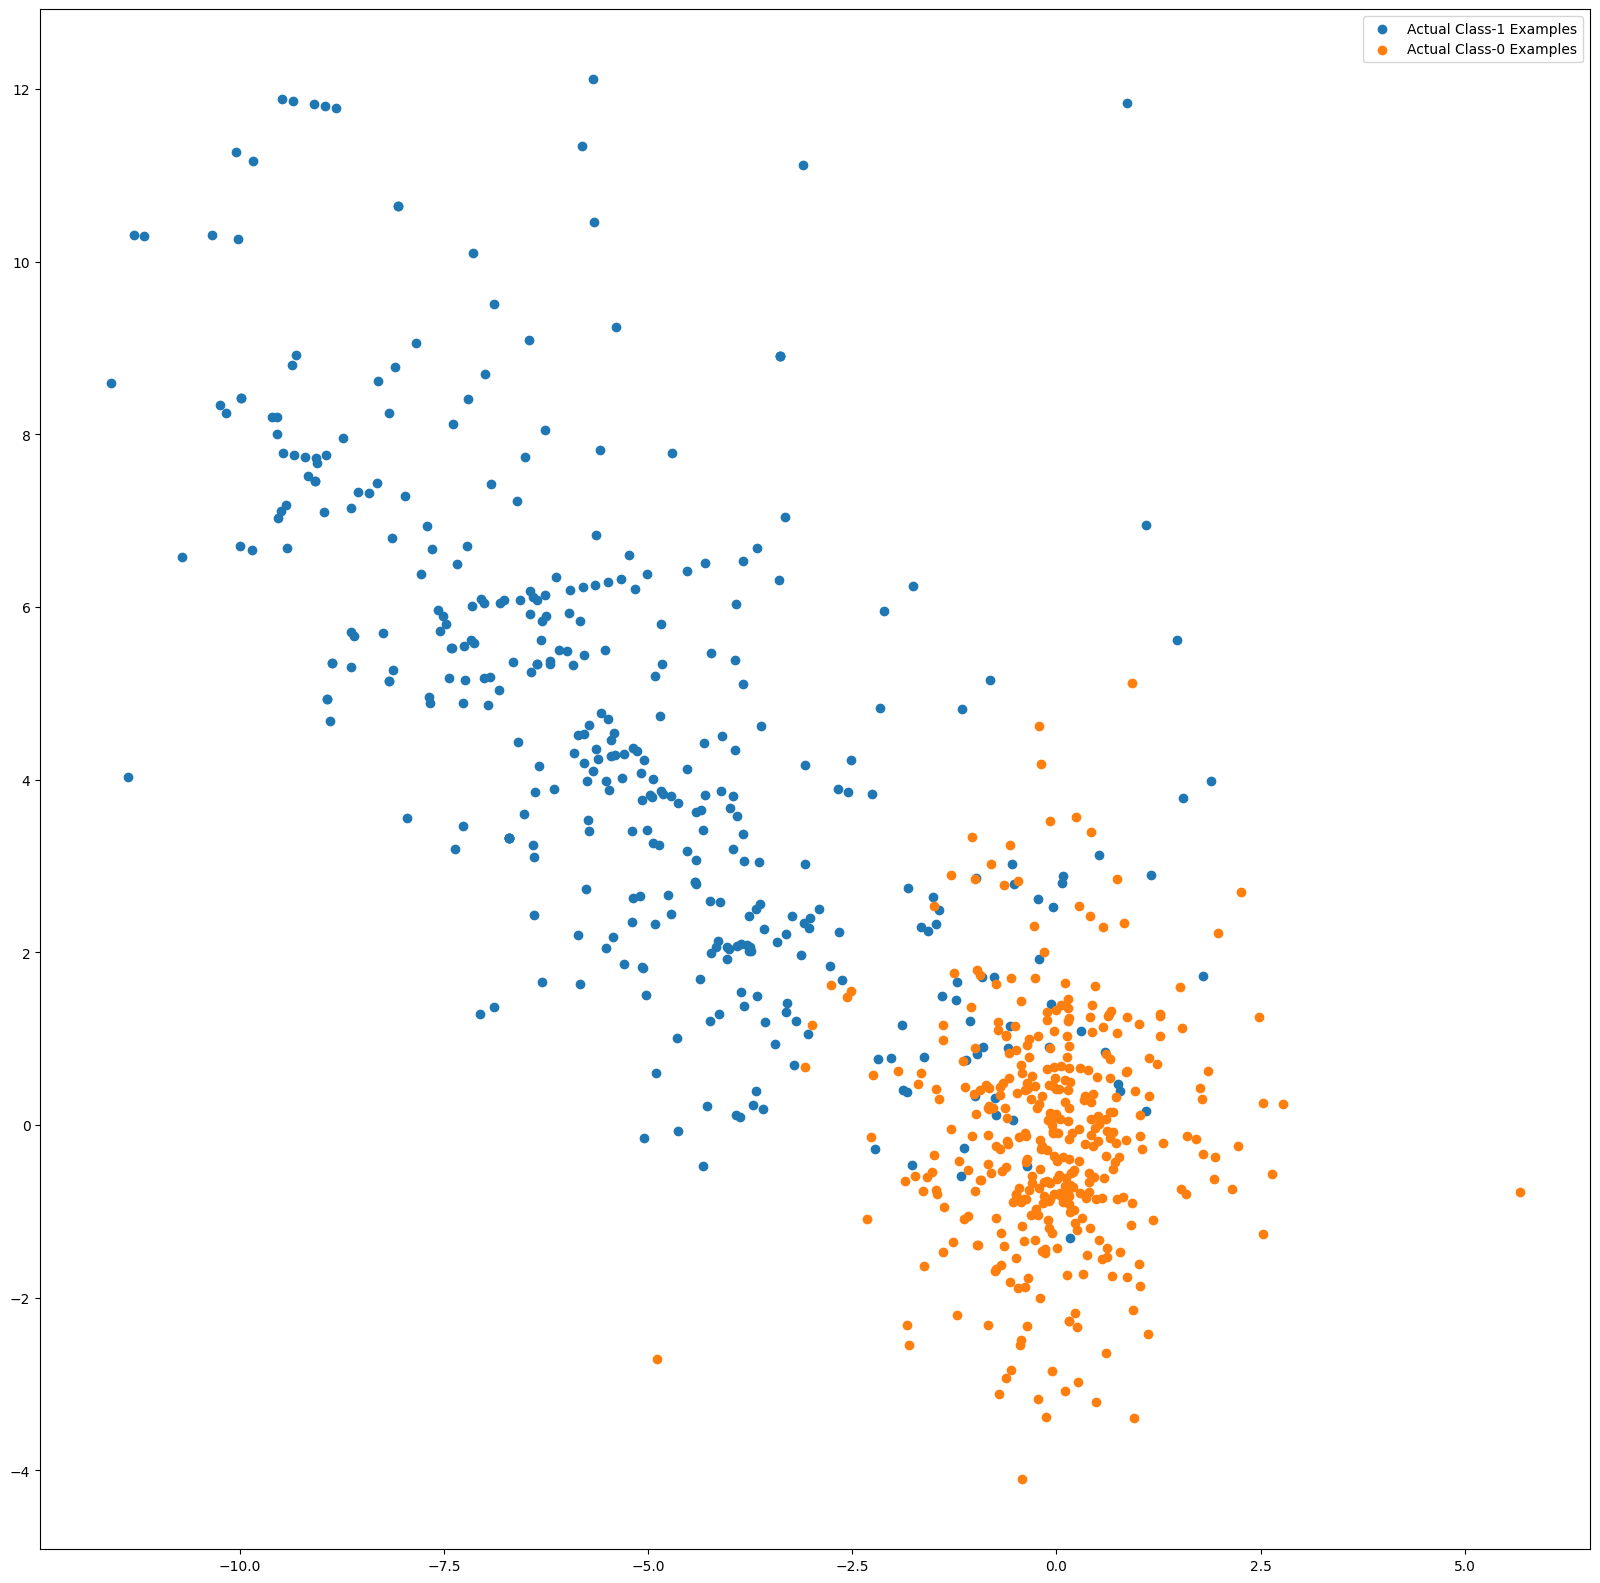

In [85]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### select the best threshold from the roc curve

In [92]:
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

2.0


###ADASYN oversampling with Random Forest model gives the best result score of 0.9999934097850416

### Best parameter {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10}
